# **1. Persiapan Dataset**

**1. Import Library**

In [1]:
# Memasukan Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Kamal
[nltk_data]     Sholihin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kamal
[nltk_data]     Sholihin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**2. Import Dataset**

In [3]:
# Memasukan Dataset
data = pd.read_csv('Dataset_Berita.csv')
data.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,headline,date,link,content,label
0,438,2039,1523,"Kaget soal Cuitan Roy Suryo, Ganjar Ngaku Juga...",24 Des 2023 16:52,https://www.detik.com/jateng/berita/d-7106961/...,Cawapres nomor urut 2 Gibran Rakabumingraka me...,1
1,1097,680,1933,Riset UGM Soroti Medsos Parpol Jelang Pemilu 2...,02 Nov 2023 16:30,https://www.detik.com/edu/detikpedia/d-7015590...,Partai yang menang di Pemilu 2019 punya aktivi...,1
2,15,635,1379,Kafe di Bima Dilarang Buka di Atas Pukul 23.00...,28 Des 2023 14:49,https://www.detik.com/bali/nusra/d-7112812/kaf...,Pemerintah Kota (Pemkot) Bima membatasi jam op...,1
3,70,530,972,[SALAH] “Giveaway Baim Wong melalui akun Faceb...,"Juli 12, 2023",https://turnbackhoax.id/2023/07/12/salah-givea...,Akun palsu. Kegiatan bagi-bagi hadiah oleh Bai...,0
4,964,1715,1976,Legislator Golkar Yakin dengan Kemampuan Calon...,02 Nov 2023 07:49,https://news.detik.com/pemilu/d-7014821/legisl...,Presiden Joko Widodo (Jokowi) memilih KSAD Jen...,1


In [4]:
df = data.sample(frac=1)
df.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,headline,date,link,content,label
185,1314,385,1855,"Gibran ke Pendukung di Jambi: Ada Fitnah, Bawa...",17 Nov 2023 23:00,https://www.detik.com/sumbagsel/berita/d-70431...,Cawapres Gibran Rakabuming Raka meminta para p...,1
1241,404,407,538,[SALAH] Kasus Jesica Resmi Ditutup Dan Jesica ...,"Oktober 24, 2023",https://turnbackhoax.id/2023/10/24/salah-kasus...,Hasil Periksa Fakta Dyah FebriyaniInformasi ti...,0
1865,554,582,1442,Ganjar Harap KPU Evaluasi Format Tanya Jawab d...,27 Des 2023 13:04,https://news.detik.com/pemilu/d-7110733/ganjar...,Capres nomor urut 03 Ganjar Pranowo meminta fo...,1
433,755,1979,983,"[SALAH] GARA-GARA RAJA SALMAN, 28 PROVINSI BER...","Juli 10, 2023",https://turnbackhoax.id/2023/07/10/salah-gara-...,Hasil periksa fakta Pekik Jalu Utomo.Faktanya ...,0
839,658,272,1234,"Cak Imin Patroli di Desa Dadaprejo: Tangi, Tan...",31 Des 2023 17:06,https://news.detik.com/pemilu/d-7117820/cak-im...,"Calon wakil presiden (cawapres) nomor urut 1, ...",1


In [50]:
df.tail(5)

,content,label,clean_text
2070,Pasangan Ganjar Pranowo dan Mahfud Md tiba di ...,Positif,pasang ganjar pranowo mahfud md kpu ri menteng...
2071,Hasil Periksa Fakta Dyah FebriyaniHoaks lama b...,Negatif,hasil periksa fakta dyah febriyanihoaks edar t...
2072,Dewan Kehormatan Penyelenggara Pemilu (DKPP) m...,Positif,dewan hormat selenggara milu dkpp tingkat lang...
2073,Hasil periksa fakta Dyah FebriyaniTidak benar....,Negatif,hasil periksa fakta dyah febriyanitidak temu k...
2074,Perhimpunan Bantuan Hukum dan Indonesia (PBHI)...,Positif,himpun bantu hukum indonesia pbhi lampir bukti...


**3. Mengambil data yg di butuh kan untuk preprocessing**

In [5]:
# Mengambil data yg di butuh kan untuk preprocessing
df = pd.DataFrame(data[['content','label']]);

df['label'] = df['label'].replace({0: 'Negatif', 1: 'Positif'})

**4. Mengecek Tabel**

In [6]:
# mengecek jumlah kolom dan baris
print('Jumlah kolom dan baris\t\t : ')
print(df.shape,'\n')

# mengecek jumlah Berita salah(0) dan Berita Benar(1)
print('Jumlah berita salah dan benar\t : ')
print(df['label'].value_counts(),'\n')

# mengecek jumlah Data yg kosong
print('Jumlah data yg kosong\t\t : ')
print(df.isnull().sum())

Jumlah kolom dan baris		 : 
(2075, 2) 

Jumlah berita salah dan benar	 : 
Positif    1038
Negatif    1037
Name: label, dtype: int64 

Jumlah data yg kosong		 : 
content    0
label      0
dtype: int64


**5. visualisasi perbandingan Dataset salah dan benar**

Text(0.5, 1.0, 'Dataset label distribuition')

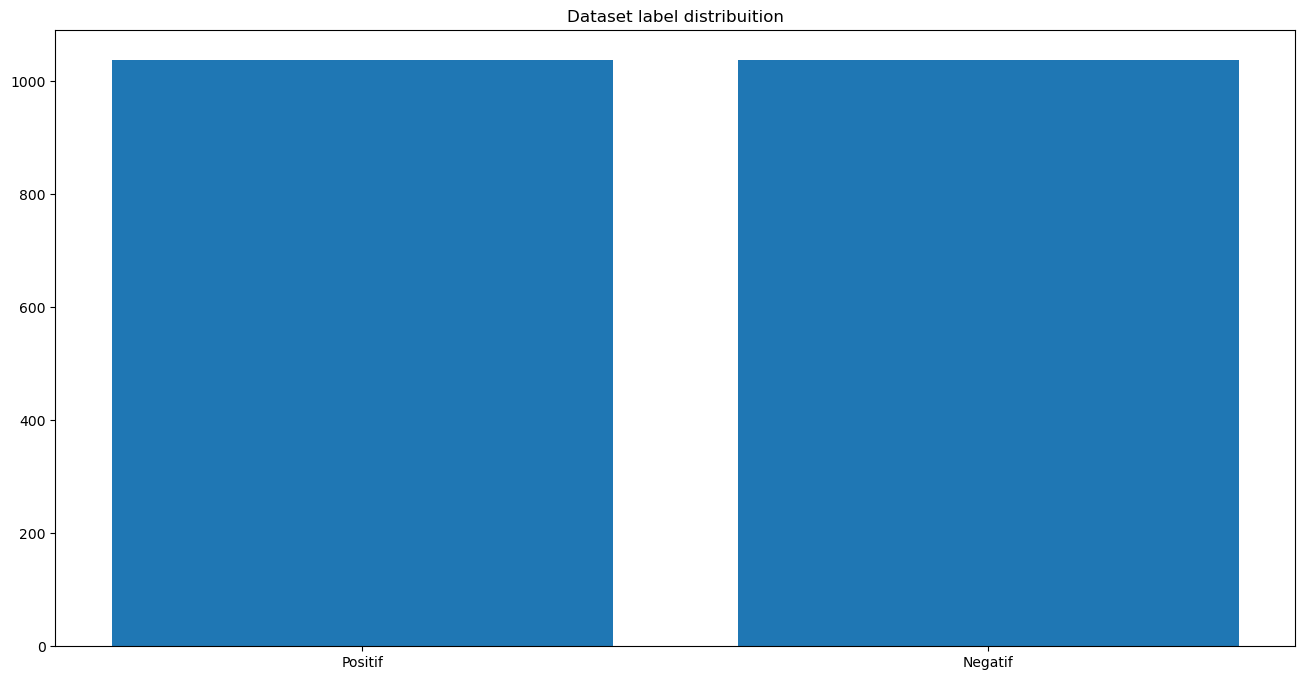

In [7]:
# Visualisasi jumlah label untuk keseimbangan
from collections import Counter

label_cnt = Counter(df.label)
plt.figure(figsize =(16,8))
plt.bar(label_cnt.keys(),label_cnt.values())
plt.title('Dataset label distribuition')

# **2. Teks Preprocessing**

**1. CaseFolding**

In [8]:
import re

# Membuat Fungsi CaseFolding
def casefolding(text):
  text = text.lower()                                   # Mengubah huruf kecil
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)    # Menghapus hyperlinks
  text = re.sub(r',',' ',text)                          # Menghapus koma
  text = re.sub(r'[-+]?[0-9]+', ' ', text)              # Menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)                  # Menghapus semua karakter yg bukan huruf dan spasi
  text = text.strip()                                   # menghapus spasi berlebih dan karakter
  return text

**2. Normalisasi Teks**

In [9]:
key_norm = pd.read_csv('key_norm.csv')

# Membuat Fungsi Normalisasi Teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
  if (key_norm['singkat'] == word).any()
  else word for word in text.split()
  ])

  text = str.lower(text)
  return text

**3. Filtering(Stopword Removal)**

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords_indonesia = stopwords.words('indonesian')

# Membuat fungsi Stopword Removal
more_stopword = []
stopwords_indonesia = stopwords_indonesia + more_stopword

def remove_stopword(text):
  clean_words = []
  words = word_tokenize(text)
  for word in words:
    if word not in stopwords_indonesia:
      clean_words.append(word)
  return " ".join(clean_words)

**4. Stemming**

In [11]:
# Menginstall Sastrawi
!pip -q install sastrawi

In [12]:
# Merubah Kata menjadi Kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat Fungsi untuk Stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [13]:
# Melakukan Percobaan pada fungsi Preprocessing
Raw_data = df['content'].iloc[2]
case_folding = casefolding(Raw_data)
teks_normal = text_normalize(case_folding)
stopword = remove_stopword(teks_normal)
text_stemming = stemming(stopword)

print('Data Mentah\t : ', Raw_data)
print('Case Folding\t : ', case_folding)
print('Teks Normatlize\t : ', teks_normal)
print('Stopword\t : ', stopword)
print('Stemming\t : ', text_stemming)

Rum mengatakan pembatasan jam operasional itu bertujuan untuk menjaga keamanan agar pelaksanaan Pemilu 2024 berjalan lancar. Ia pun mengancam akan menutup kafe maupun tempat hiburan yang melanggar."Kalau ditemukan (melanggar), saya langsung gembok," tandas Rum.Pembatasan jam operasional kafe dan tempat hiburan malam itu tertuang dalam surat imbauan bernomor: 300/570/XIII/2023 yang ditandatangani Pj Walikota Bima Mohammad Rum. Ada lima poin yang ditekankan dalam surat imbauan tersebut.Pertama, meminta pemilik kafe maupun tempat hiburan lainnya untuk menjaga situasi keamanan dan ketertiban di lingkungan tempat usaha masing-masing. Kedua, memberikan dukungan bagi terciptanya Pemilu 2024 yang aman, damai, dan demokratis.Ketiga, dilarang keras menyediakan dan melakukan transaksi jual-beli miras narkoba hingga barang adiktif terlarang lainnya. Keempat, membatasi jam operasional tempat hiburan malam dan kafe hanya sampai pukul 23.00 Wita, terhitung tanggal 8 Desember 2023.Kelima, tim gabungan

**5. Text Processing Pipeline**

In [14]:
# Membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopword(text)
  text = stemming(text)
  return text

In [15]:
# Eksekusi fungsi preprocessing
df['clean_text'] = df['content'].apply(text_preprocessing)

In [16]:
# Memasukan data kedalam file csv
df.to_csv('clean_data.csv')

# **3. Feature Engineering**

In [17]:
# Pisahkan kolom feature dan target
x = df['clean_text']
y = df['label']

**1. Feature Extraction(Tf-Idf & N-Gram)**

In [18]:
# Save Model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer()
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_, open('Feature_tf-idf.sav', 'wb'))

In [19]:
# Menampilkan Vocabulary dari tf-idf
vec_TF_IDF.vocabulary_

{'cawapres': 2621,
 'nomor': 10789,
 'urut': 16732,
 'gibran': 5175,
 'rakabumingraka': 12771,
 'sorot': 14781,
 'guna': 5372,
 'alat': 402,
 'debat': 3257,
 'kait': 7118,
 'capres': 2565,
 'ganjar': 4930,
 'pranowo': 12297,
 'jatah': 6775,
 'nempel': 10601,
 'telinga': 15787,
 'clip': 2860,
 'on': 11071,
 'nya': 10906,
 'baju': 1411,
 'mic': 9860,
 'surakarta': 15266,
 'jawa': 6784,
 'minggu': 9940,
 'kutip': 8368,
 'detknews': 3462,
 'bekal': 1737,
 'sebut': 13929,
 'sedia': 13944,
 'antisipasi': 814,
 'ganggu': 4922,
 'teknis': 15763,
 'proses': 12469,
 'fungsi': 4838,
 'pegang': 11640,
 'teknologi': 15764,
 'canggih': 2539,
 'sih': 14437,
 'kaget': 7106,
 'roy': 13402,
 'suryo': 15304,
 'anggap': 698,
 'disalahgunakan': 3702,
 'oh': 11015,
 'ya': 17334,
 'orang': 11117,
 'pikir': 11972,
 'ilmu': 6139,
 'gamblang': 4904,
 'tuduh': 16407,
 'bocor': 2133,
 'contek': 2959,
 'layang': 8577,
 'khusus': 7749,
 'klarifikasi': 7838,
 'langsung': 8507,
 'gampang': 4911,
 'tanyain': 15636,
 '

In [20]:
# Melihat Jumlah Fitur
print(len(vec_TF_IDF.get_feature_names_out()))

17591


In [21]:
# Melihat Fitur yang ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aaauuuu' 'aaauuuuu' ... 'zulkarnainsekretaris' 'zulkifli' 'zuyyina']


In [22]:
x1 = x_tf_idf.toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns = vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aaauuuu,aaauuuuu,aaib,aam,aamiiin,aamiin,aamin,aas,ab,...,zul,zuldhadril,zulfa,zulfikar,zulhadril,zulhas,zulhasril,zulkarnainsekretaris,zulkifli,zuyyina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2. Feature Selection**

In [23]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 3000)
x_kbest_features =chi2_features.fit_transform(x_train, y_train)

# untuk Reduce Feature
print('Original Feature Number', x_train.shape[1])
print('Reduce Feature Number', x_kbest_features.shape[1])

Original Feature Number 17591
Reduce Feature Number 3000


In [25]:
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

,Nilai
0,0.374795
1,0.069816
2,0.069816
3,0.213819
4,0.075914
...,...
17586,4.078373
17587,0.112443
17588,0.012945
17589,0.070599


In [26]:
# menampilkan Feature beserta nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.374795,aa
1,0.069816,aaauuuu
2,0.069816,aaauuuuu
3,0.213819,aaib
4,0.075914,aam
...,...,...
17586,4.078373,zulhas
17587,0.112443,zulhasril
17588,0.012945,zulkarnainsekretaris
17589,0.070599,zulkifli


In [27]:
# Mengurutkan nilai Feature terbaik
Data.sort_values(by = 'Nilai', ascending = False)

,Nilai,Fitur
16872,6.149429e+01,video
8067,3.754656e+01,konten
16644,3.620494e+01,unggah
7832,3.427271e+01,klaim
373,3.268337e+01,akun
...,...,...
5549,5.775511e-07,handheld
11011,3.164221e-07,ogah
12621,1.520186e-07,putera
2899,1.405172e-08,colek


In [28]:
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [29]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yg sudah di tetapkan chi square
new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aamiin',
 'ababil',
 'abadi',
 'abar',
 'abu',
 'abuya',
 'ac',
 'acak',
 'acara',
 'ace',
 'adegan',
 'aden',
 'adi',
 'adib',
 'adil',
 'adu',
 'advertising',
 'advokasi',
 'advokat',
 'adwan',
 'aedes',
 'aegypti',
 'aeon',
 'afif',
 'afiliasi',
 'afp',
 'africa',
 'afrika',
 'aga',
 'agam',
 'agama',
 'agenda',
 'agnes',
 'agu',
 'agung',
 'agus',
 'agustiar',
 'agustina',
 'agustus',
 'ahok',
 'ahy',
 'aibon',
 'aidil',
 'aidit',
 'aids',
 'aiman',
 'ainayya',
 'airlangga',
 'ajak',
 'ajang',
 'ajinomoto',
 'ajman',
 'akar',
 'akibat',
 'aklamasi',
 'akrab',
 'akronim',
 'aksi',
 'aktor',
 'aktual',
 'aku',
 'akun',
 'al',
 'alam',
 'alas',
 'alat',
 'alhamdulillah',
 'ali',
 'alir',
 'alissa',
 'aljazair',
 'alkohol',
 'allah',
 'almas',
 'aluminium',
 'alumni',
 'aman',
 'amanah',
 'amanat',
 'amazon',
 'ambar',
 'ambil',
 'ambrol',
 'ambulans',
 'america',
 'american',
 'amerika',
 'amichai',
 'amin',
 'aminuddin',
 'amnesti',
 'ampi',
 'amplop',
 'amran',
 'amuk',
 'amungkas

In [30]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
new_selected_feature = {}

for(k, v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature :
    new_selected_feature[k]=v

new_selected_feature

{'cawapres': 2621,
 'nomor': 10789,
 'urut': 16732,
 'gibran': 5175,
 'sorot': 14781,
 'guna': 5372,
 'alat': 402,
 'debat': 3257,
 'kait': 7118,
 'capres': 2565,
 'ganjar': 4930,
 'pranowo': 12297,
 'on': 11071,
 'nya': 10906,
 'surakarta': 15266,
 'jawa': 6784,
 'minggu': 9940,
 'bekal': 1737,
 'sebut': 13929,
 'sedia': 13944,
 'antisipasi': 814,
 'teknis': 15763,
 'proses': 12469,
 'fungsi': 4838,
 'pegang': 11640,
 'sih': 14437,
 'roy': 13402,
 'suryo': 15304,
 'anggap': 698,
 'oh': 11015,
 'ya': 17334,
 'orang': 11117,
 'pikir': 11972,
 'ilmu': 6139,
 'gamblang': 4904,
 'khusus': 7749,
 'langsung': 8507,
 'gampang': 4911,
 'cuit': 3043,
 'rakabuming': 12770,
 'raka': 12767,
 'kena': 7555,
 'detikcom': 3447,
 'akun': 373,
 'kpu': 8162,
 'laku': 8448,
 'adil': 138,
 'serta': 14242,
 'komisi': 7949,
 'pilih': 11984,
 'ban': 1466,
 'calon': 2509,
 'wakil': 17005,
 'gelar': 5037,
 'milu': 9918,
 'mati': 9421,
 'hasyim': 5655,
 'terang': 15867,
 'tempel': 15814,
 'sambung': 13685,
 'pub

In [31]:
len(new_selected_feature)

3000

In [32]:
pickle.dump(new_selected_feature, open('new_selected_feature_tf-idf.sav', 'wb'))

In [33]:
# menampilkan fitur-fitur yang sudah di seleksi
data_selected_feature = pd.DataFrame(x_kbest_features, columns = selected_feature)
data_selected_feature

,aamiin,ababil,abadi,abar,abu,abuya,ac,acak,acara,ace,...,zalim,zaman,zara,zaytun,zelenskyy,ziarah,zita,zon,zudan,zulhas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083105,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **4. Modeling**

In [34]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**1. Import Library**

In [35]:
#import library
from sklearn.model_selection import train_test_split

**2. train & test split**

In [71]:
x = selected_x
y = df.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [72]:
# Menampilkan jumlah data training dan jumlah data testing
print('Banyaknya x_train : ', len(x_train))
print('Banyaknya x_test : ', len(x_test))

Banyaknya x_train :  1660
Banyaknya x_test :  415


**3. Menyiapkan fungsi untuk proses modeling**

In [73]:
# Membuat model prediksi
data_input = ('Unggahan video dengan klaim bahwa Gibran Rakabuming membalas hinaan yang dilontarkan oleh Megawati Soekarnoputri merupakan konten yang menyesatkan. Faktanya, video tersebut berasal dari dua peristiwa yang tidak saling berkaitan.[KATEGORI]: Konten yang Menyesatkan[NARASI]: “Gibran balas hinaan megawati!!! #jokowi #gibranrakabuming #prabowosubianto #allinprabowo”Akun TikTok Ruang Rakyat (https://www.tiktok.com/@ruang.rakyat) mengunggah video dengan klaim bahwa anak sulung Presiden Joko Widodo, Gibran Rakabuming Raka, membalas hinaan yang dilontarkan oleh Ketua Umum PDI Perjuangan, Megawati Soekarnoputri. Dalam unggahan ditampilkan pula video Megawati yang menyebut bahwa Jokowi tak bisa jadi presiden tanpa partainya.Setelah dilakukan penelusuran, faktanya isi video tersebut berasal dari dua peristiwa yang tidak saling berkaitan.Pertama, video Megawati yang menyebut bahwa Jokowi tidak bisa jadi presiden tanpa PDI-P nyatanya diambil dari pidato politiknya dalam acara HUT ke-50 PDI-P pada 10 Januari 2023. Ia mengatakan bahwa pada dasarnya, seseorang hanya bisa menjadi presiden melalui partai.Kedua, potongan video yang diklaim sebagai bukti bahwa Gibran membalas hinaan Megawati nyatanya diambil dari pidato politik yang ia ungkapkan di Gelora Bung Karno pada 25 Oktober 2023. Dalam pidato tersebut, Gibran membeberkan deretan program kerja yang telah ia susun bersama Prabowo sebagai pasangan Capres-Cawapres pada Pemilu 2024.Dengan demikian, informasi yang disebarluaskan oleh akun TikTok Ruang Rakyat merupakan informasi yang salah.')
data_input = text_preprocessing(data_input)

# load data
loaded_vec = TfidfVectorizer(decode_error='replace', vocabulary = set(pickle.load(open('new_selected_feature_tf-idf.sav', 'rb'))))

**4. Proses Modeling menggunakan algoritma Naive Bayes**

In [74]:
#import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

# Proses Training menggunakan Naive Bayes
model_NB = MultinomialNB().fit(x_train, y_train)

In [75]:
hasil_NB = model_NB.predict(loaded_vec.fit_transform([data_input]))

if(hasil_NB == 'Negatif'):
  h_NB = 'Fake News'
elif(hasil_NB == 'Positif'):
  h_NB = 'Real News'

print('Hasil Prediksi\t : ', h_NB)

Hasil Prediksi	 :  Fake News


In [76]:
# menyimpan Model
pickle.dump(model_NB, open('model_NB.sav', 'wb'))

**5. Proses Modeling menggunakan algoritma Support Vector Machine**

In [77]:
#import algoritma naive bayes
from sklearn.svm import SVC

# Proses Training menggunakan Naive Bayes
model_SVM = SVC().fit(x_train, y_train)

In [78]:
dense_data_input = loaded_vec.fit_transform([data_input]).toarray()

hasil_SVM = model_SVM.predict(dense_data_input)

if (hasil_SVM == 'Negatif'):
    h_SVM = 'Fake News'
elif (hasil_SVM == 'Positif'):
    h_SVM = 'Real News'

print ('Hasil Prediksi\t : ', h_SVM)

Hasil Prediksi	 :  Fake News


In [79]:
# Menyimpan Model
pickle.dump(model_SVM, open('model_SVM.sav', 'wb'))

# **5. Evaluasi Model**

**1. Import Library**

In [80]:
from sklearn.metrics import confusion_matrix

**2. Evaluasi Model Naive Bayes**

In [81]:
from sklearn.model_selection import cross_val_score

# Menghitung skor cross-validation
cv_scores = cross_val_score(model_SVM, x_test, y_test, cv=10)  # cv=5 artinya menggunakan 5-fold cross-validation

# Mencetak skor cross-validation
print("Cross-Validation Scores:", cv_scores)

# Mencetak rata-rata skor cross-validation
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.97619048 0.97619048 0.97619048 1.         1.         1.
 0.97560976 1.         1.         0.97560976]
Average Cross-Validation Score: 0.9879790940766551


test time: 0.019s
accuracy: 0.995
              precision    recall  f1-score   support

     Negatif       0.99      1.00      1.00       204
     Positif       1.00      0.99      1.00       211

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415

Distribusi kelas di y_test:
Positif    211
Negatif    204
Name: label, dtype: int64

Distribusi kelas di prediksi:
Positif    209
Negatif    206
dtype: int64


Text(70.72222222222221, 0.5, 'Label Aktual')

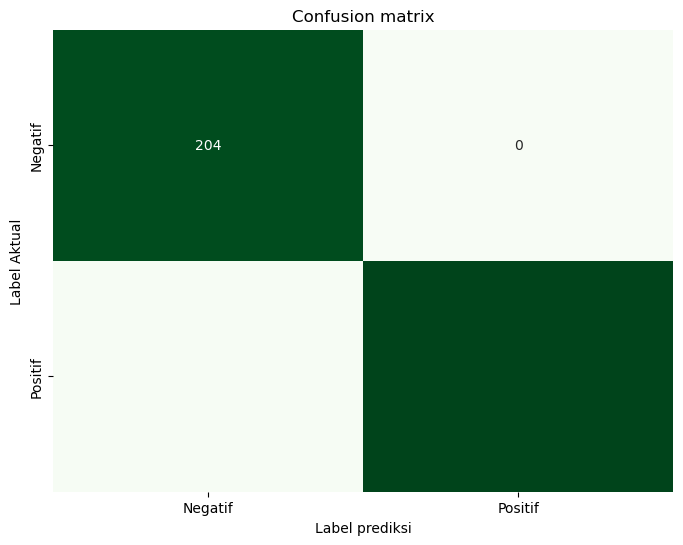

In [91]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame

t = time()
predicted = model_NB.predict(x_test)

test_time = time() - t
print("test time: %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, predicted)
print("accuracy: %0.3f" % score1)
print(metrics.classification_report(y_test, predicted, target_names=['Negatif', 'Positif']))

# Periksa distribusi kelas di data uji dan prediksi
print("Distribusi kelas di y_test:")
print(y_test.value_counts())
print("\nDistribusi kelas di prediksi:")
print(pd.Series(predicted).value_counts())

columns = ['Negatif', 'Positif']
confm = confusion_matrix(y_test, predicted)
df_cm = DataFrame(confm, index=columns, columns=columns)

plt.figure(figsize=(8, 6))
ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d', cbar=False)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label Aktual')

**3. Evaluasi Model SVM**

*Cross Validation*

In [83]:
from sklearn.model_selection import cross_val_score

# Menghitung skor cross-validation
cv_scores = cross_val_score(model_SVM, x_test, y_test, cv=10)  # cv=5 artinya menggunakan 5-fold cross-validation

# Mencetak skor cross-validation
print("Cross-Validation Scores:", cv_scores)

# Mencetak rata-rata skor cross-validation
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.97619048 0.97619048 0.97619048 1.         1.         1.
 0.97560976 1.         1.         0.97560976]
Average Cross-Validation Score: 0.9879790940766551


*Confusion Matrix*

test time: 2.239s
accuracy: 0.998
              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00       204
     Positif       1.00      1.00      1.00       211

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415

Distribusi kelas di y_test:
Positif    211
Negatif    204
Name: label, dtype: int64

Distribusi kelas di prediksi:
Positif    210
Negatif    205
dtype: int64


Text(50.722222222222214, 0.5, 'Label Aktual')

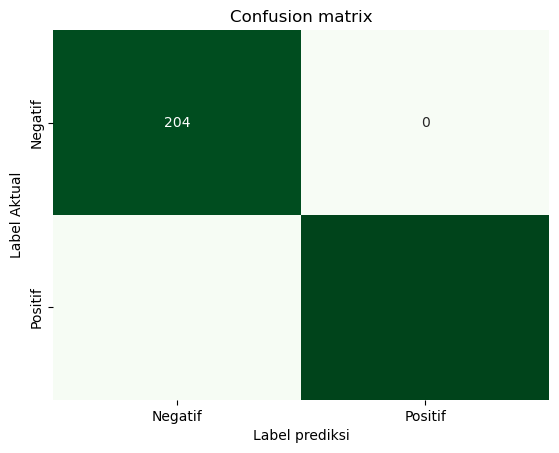

In [92]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame

t = time()
predicted = model_SVM.predict(x_test)

test_time = time() - t
print("test time: %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, predicted)
print("accuracy: %0.3f" % score1)
print(metrics.classification_report(y_test, predicted, target_names=['Negatif', 'Positif']))

# Periksa distribusi kelas di data uji dan prediksi
print("Distribusi kelas di y_test:")
print(y_test.value_counts())
print("\nDistribusi kelas di prediksi:")
print(pd.Series(predicted).value_counts())


columns = ['Negatif', 'Positif']
confm = confusion_matrix(y_test, predicted)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d', cbar=False)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label Aktual')